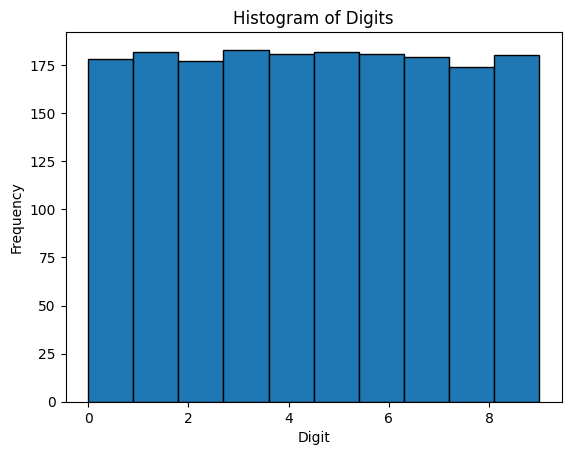

In [1]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset from sklearn
digits_data = load_digits()
X, y = digits_data.data, digits_data.target


# Show a historam of dataset
plt.hist(y, bins=10, edgecolor='black')
plt.title('Histogram of Digits')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()


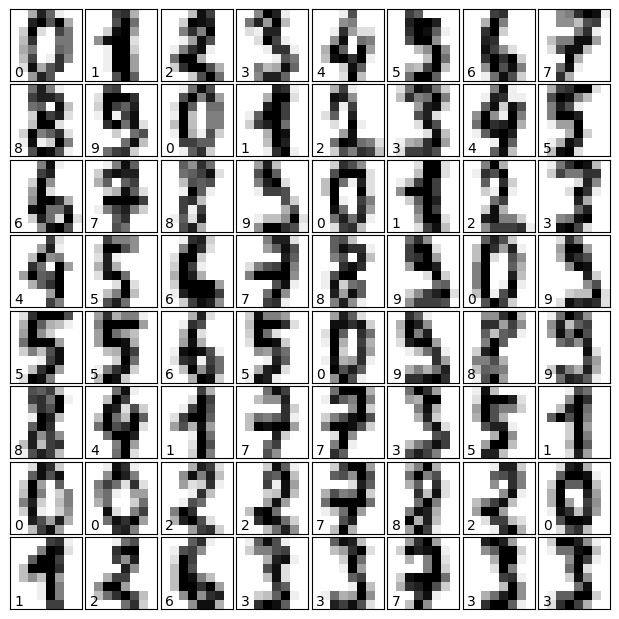

In [2]:
# Plot first 64 instances
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits_data.images[i], cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits_data.target[i]))

In [3]:

#Split the data into training, validation, and test sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


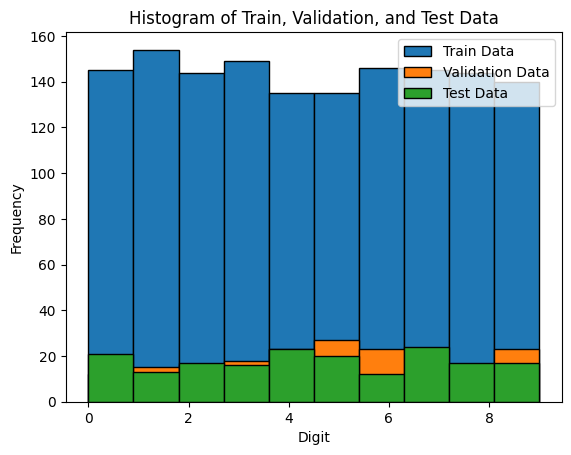

In [4]:
# Show a histogram of train, validation and test data
plt.hist(y_train, bins=10, edgecolor='black', label='Train Data')
plt.hist(y_val, bins=10, edgecolor='black', label='Validation Data')
plt.hist(y_test, bins=10, edgecolor='black', label='Test Data')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Histogram of Train, Validation, and Test Data')
plt.legend()
plt.show()

In [5]:
# a bit of a confising consept to understand ? neurons -> output ?

# One-hot encode the labels
y_train_one_hot = tf.one_hot(y_train, depth=10)
y_val_one_hot = tf.one_hot(y_val, depth=10)
y_test_one_hot = tf.one_hot(y_test, depth=10)

None indicates that the batch size is variable.
Number of parameters: (64? neurons * 64 inputs + 64? biases) = 4160.

In [6]:
# Create a basic neural network model. 
model = tf.keras.Sequential([
    tf.keras.Input(shape=X_train.shape[1:]),  # Input layer with shape inferred from data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])


# Print model summary
model.summary()
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train_one_hot,  # Training data
                    epochs=25,  # Number of epochs(training cycles)
                    batch_size=32,  # Batch size(upate every 32 samples)
                    validation_data=(X_val, y_val_one_hot))  # Validation data(evaluating the model's performance after each epoch)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,810 (18.79 KB)

 Trainable params: 4,810 (18.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2644 - loss: 4.6661 - val_accuracy: 0.7222 - val_loss: 0.8096
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7942 - loss: 0.6218 - val_accuracy: 0.8667 - val_loss: 0.4262
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8971 - loss: 0.3098 - val_accuracy: 0.9000 - val_loss: 0.2786
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9430 - loss: 0.2000 - val_accuracy: 0.9000 - val_loss: 0.2293
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9577 - loss: 0.1605 - val_accuracy: 0.9278 - val_loss: 0.1845
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9679 - loss: 0.1249 - val_accuracy: 0.9333 - val_loss: 0.1826
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9760 - loss: 0.1034 - val_accuracy: 0.9389 - val_loss: 0.1567
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9874 - loss: 0.0711 - val_accuracy: 0.9500 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.1236 
Test Loss: 0.08629484474658966
Test Accuracy: 0.9833333492279053
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


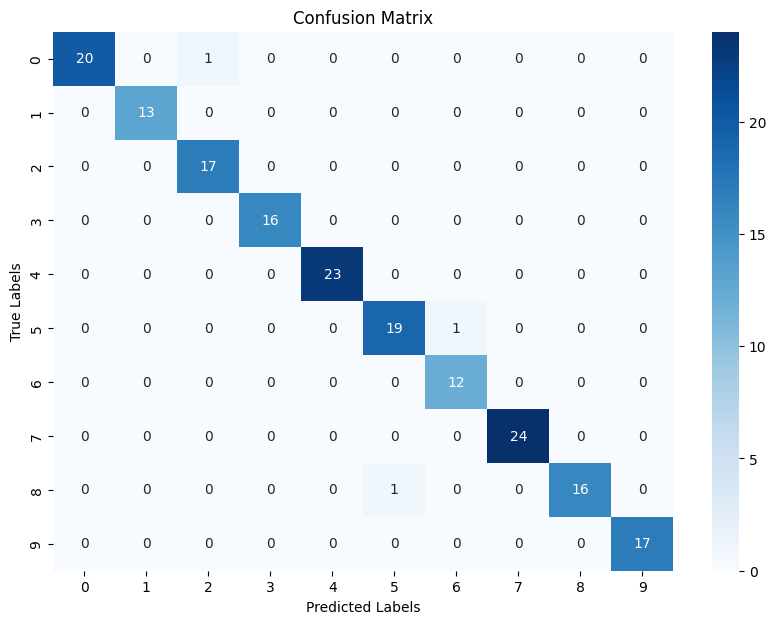

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predict the test set results
y_pred = model.predict(X_test)

#convert the predicted probabilities and the one-hot encoded test labels back to their original class labels.
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [8]:
def plot_history(history):
    # Accuracy plot
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Loss plot
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()


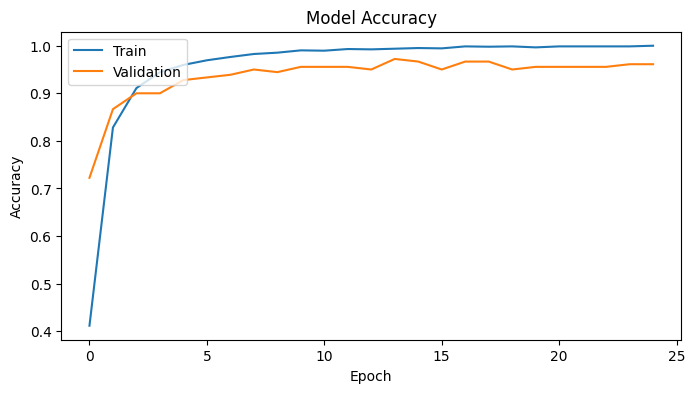

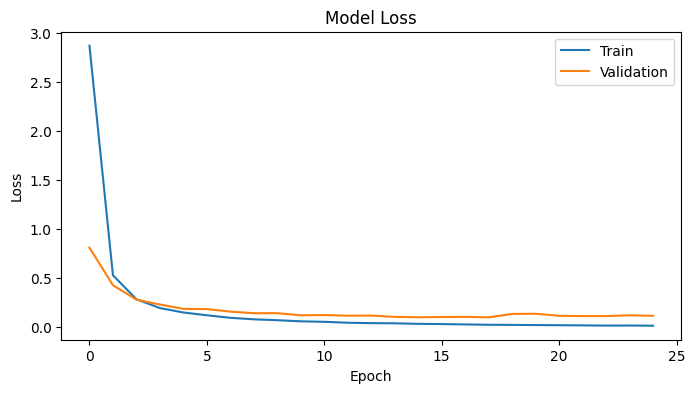

In [9]:
plot_history(history)
